In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns 
sns.set() 
from sklearn.cluster import KMeans #use skykitlearn libarary for clustering

In [3]:
 df = pd.read_csv("Countries.csv")

In [4]:
df

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [5]:
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [6]:
df.shape

(241, 3)

### Display data before clustering

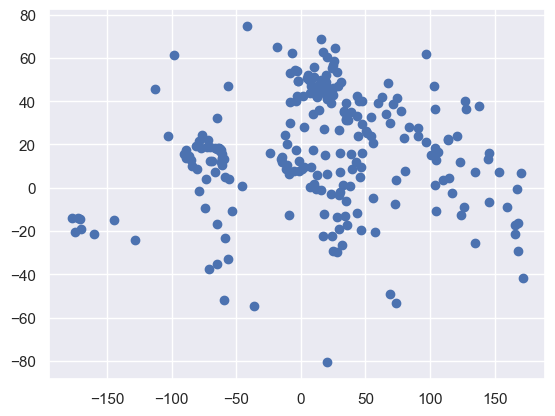

In [8]:
plt.scatter(df['Longitude'], df['Latitude'])

### Selecting the features 

In [10]:
cluster_data = df.iloc[:,[1,2]]

In [11]:
cluster_data

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [12]:
cluster_data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [13]:
cluster_data.shape

(241, 2)

In [14]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler() 
cluster_data = pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude', 'Latitude'])

In [24]:
kmeans = KMeans(4)

In [26]:
kmeans.fit(cluster_data)

C:\Users\sithu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [28]:
identified_clusters = kmeans.fit_predict(cluster_data) 

C:\Users\sithu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
identified_clusters

array([1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 1, 3, 2, 3, 1, 2, 0, 0, 3, 0, 1, 1,
       2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 3, 3, 0, 3, 2, 1, 3,
       3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 2, 3, 0, 0, 2, 3, 0, 0, 0, 1, 1, 1, 1, 3, 0, 1, 0, 1,
       2, 1, 2, 3, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 3, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 3, 0, 0, 0,
       2, 1, 0, 0, 0, 3, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 3, 1, 1, 3, 3, 2,
       3, 2, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1,
       2, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 1, 2, 3, 3, 2, 1, 1, 0, 2,
       2, 0, 0, 3, 1, 0, 0, 0, 3, 1, 3, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0,
       0, 2, 3, 3, 0, 3, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 3, 3])

In [32]:
new_df = df.copy()

In [36]:
new_df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [38]:
new_df["cluster_No"] = identified_clusters

In [40]:
new_df.head()

,name,Longitude,Latitude,cluster_No
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


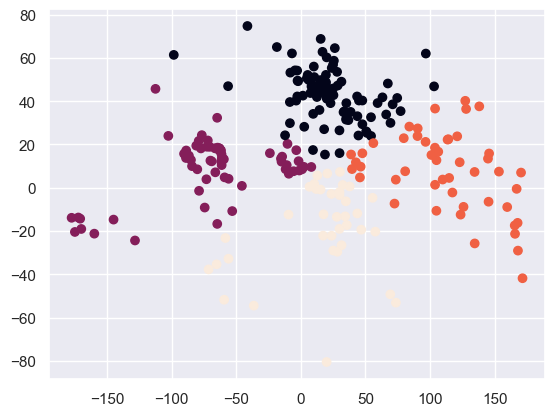

In [42]:
plt.scatter(new_df['Longitude'], new_df['Latitude'], c = new_df['cluster_No'])

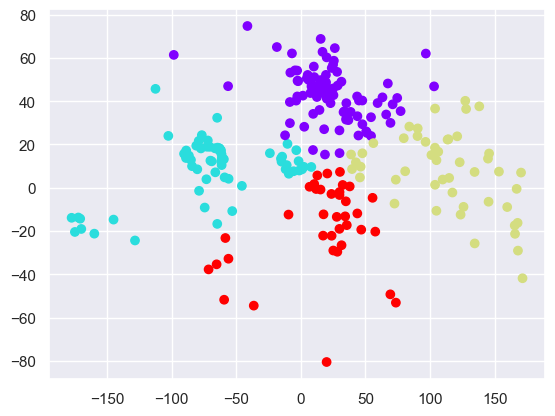

In [44]:
plt.scatter(new_df['Longitude'], new_df['Latitude'], c = new_df['cluster_No'], cmap='rainbow')

In [50]:
wcss=[] 
for i in range(1,11): 
    kmeans = KMeans(i) 
    kmeans.fit(cluster_data) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter)

C:\Users\sithu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sithu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sithu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sithu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Within-cluster Sum of Squares')

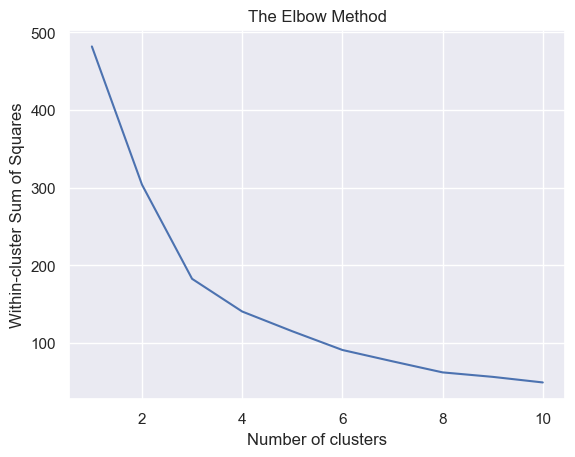

In [52]:
number_clusters = range(1,11) 
plt.plot(number_clusters,wcss) 
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')

In [54]:
# We use this method for find the optimal number of dataset. This pointer of the Elbow bspecify the optimal number of clusters that can be formed